In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import iris

In [2]:
cp_model_rotated_pole = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)
platecarree = ccrs.PlateCarree()

In [3]:
london_cpm = xr.load_dataset("../../../../derived_data/2.2km-london/rcp85/01/pr/day/pr_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc")

In [4]:
def plot_rp_chunk(data, variable='pr'):
    plt.figure(figsize=(14,6))

    ax = plt.axes(projection=cp_model_rotated_pole)

    data[variable].plot(ax=ax, x='grid_longitude', y='grid_latitude', add_colorbar=True, transform=cp_model_rotated_pole)

    ax.coastlines()
    
    plt.show()

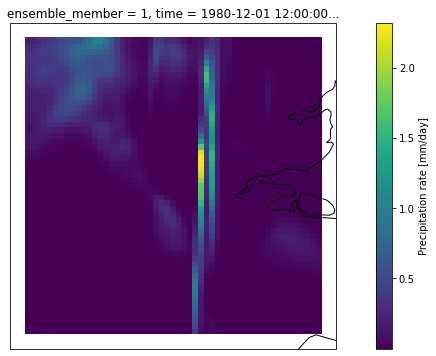

In [5]:
plot_rp_chunk(london_cpm.isel(time=0))

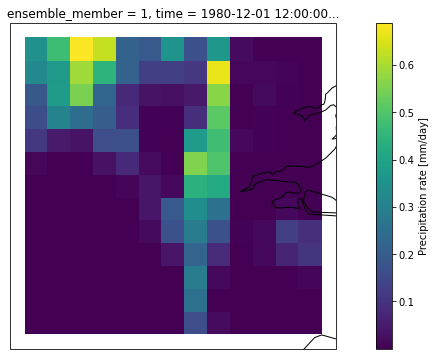

In [6]:
sf=4
coarsened_london_cpm = london_cpm.coarsen(grid_latitude=sf, grid_longitude=sf, boundary="trim").mean()
plot_rp_chunk(coarsened_london_cpm.isel(time=0))

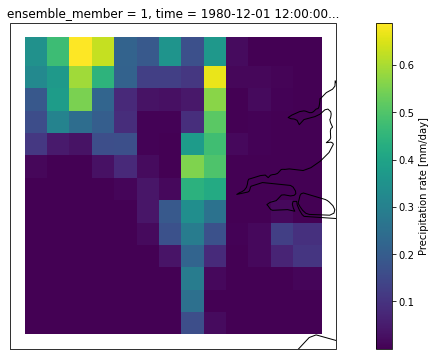

In [7]:
regridder = iris.analysis.Nearest().regridder(coarsened_london_cpm.pr.to_iris(), london_cpm.pr.to_iris())
regridded_coarse_london_cpm = regridder(coarsened_london_cpm.pr.to_iris())
london_cpm['pr'] = xr.DataArray.from_iris(regridded_coarse_london_cpm)
plot_rp_chunk(london_cpm.isel(time=0))

In [8]:
reloaded_coarsened_london_cpm = xr.load_dataset("../../../../derived_data/coarsened-4x-2.2km-london/rcp85/01/pr/day/pr_rcp85_land-cpm_uk_2.2km_01_day_19801201-19811130.nc")

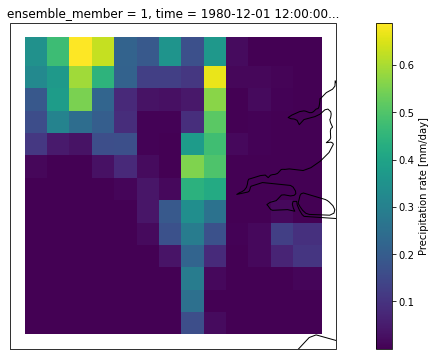

In [9]:
plot_rp_chunk(reloaded_coarsened_london_cpm.isel(time=0))